Assignment_01
Webscraper


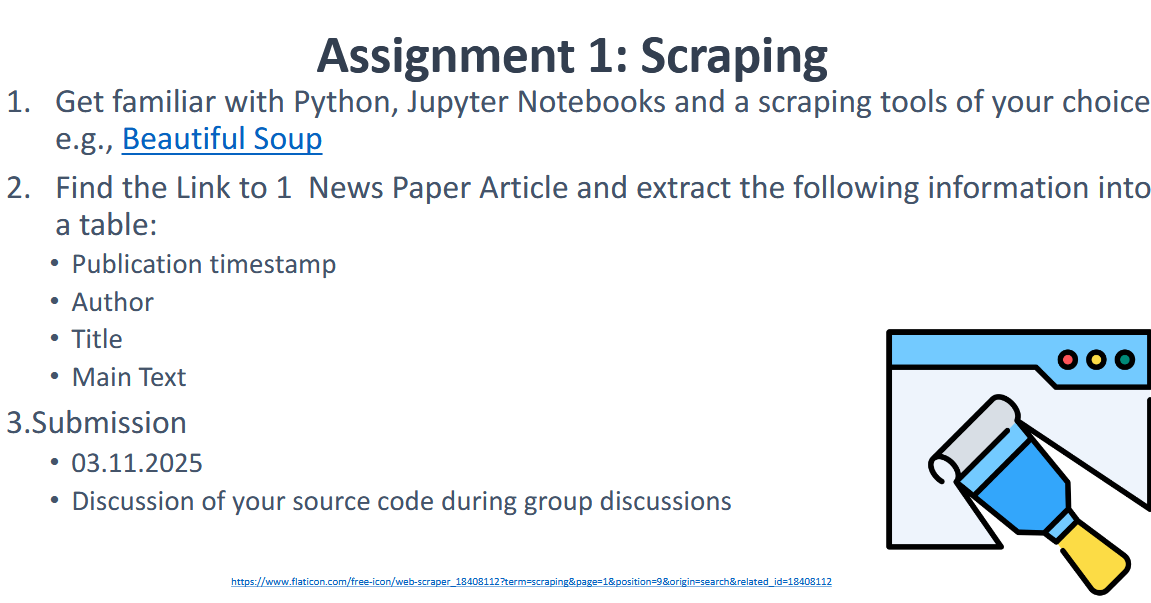

Infos: 
https://pypi.org/project/beautifulsoup4/


TODO: Funktioniert nicht für jede Website(HTML) muss also ständig angepasst werden

In [ ]:
# installation
!pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

/robots.txt des Artiekls Prüfen

In [ ]:
# Url des Zeitungsartikels 
url = "https://www.bild.de/politik/katherina-reiche-luftangriff-in-der-nacht-ministerin-muss-in-bunker-68fc6fb3c008edcf0c85308f"

In [ ]:
# HTML Herunterladen
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
# HTML anzeigen
print(soup.prettify())

In [ ]:
# HTML extrahieren

# --- Titel ---
title_tag = soup.find("h2", class_="document-title")
title = title_tag.text.strip() if title_tag else "Titel nicht gefunden"

# --- Autor ---
author_div = soup.find("div", class_="article_author__details")
author = author_div.find("p").text.strip() if author_div else "Autor nicht gefunden"

# --- Datum ---
date_tag = soup.find("time", class_="datetime")
date = date_tag.get("datetime") if date_tag else "Datum nicht gefunden"

# --- Artikeltext ---
article_body = soup.find("div", class_="article-body")
paragraphs = article_body.find_all("p") if article_body else []
text = " ".join(p.get_text(strip=True) for p in paragraphs)
# get_text(strip=True) – holt nur den Text, entfernt Leerzeichen und Zeilenumbrüche.

In [ ]:
# --- Ausgabe ---
print("Titel:", title)
print("Autor:", author)
print("Datum:", date)
print("Text:", text)